<a href="https://colab.research.google.com/github/STasnim03/Machine_Learning/blob/main/Credit_Card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [2]:
import pandas as pd

df = pd.read_csv(path + "/creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


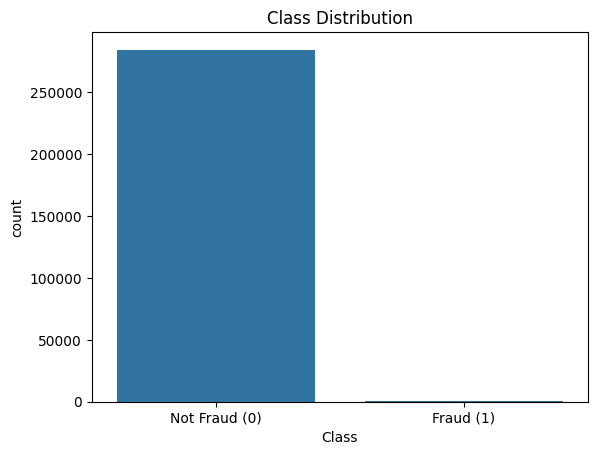

Class
0    284315
1       492
Name: count, dtype: int64
Fraud Percentage: 0.17275%


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.show()

# Print counts
print(df['Class'].value_counts())
print("Fraud Percentage: {:.5f}%".format(df['Class'].mean() * 100))


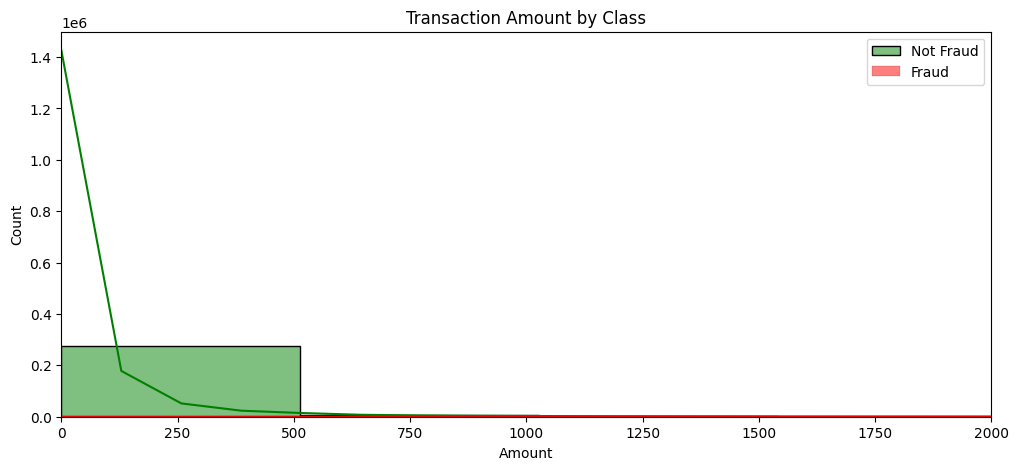

In [4]:
plt.figure(figsize=(12, 5))

# Non-fraud
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='green', label='Not Fraud', kde=True)
# Fraud
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', kde=True)

plt.title('Transaction Amount by Class')
plt.legend()
plt.xlim(0, 2000)  # Zoom in to better see trends
plt.show()


# **Fraud over Time**

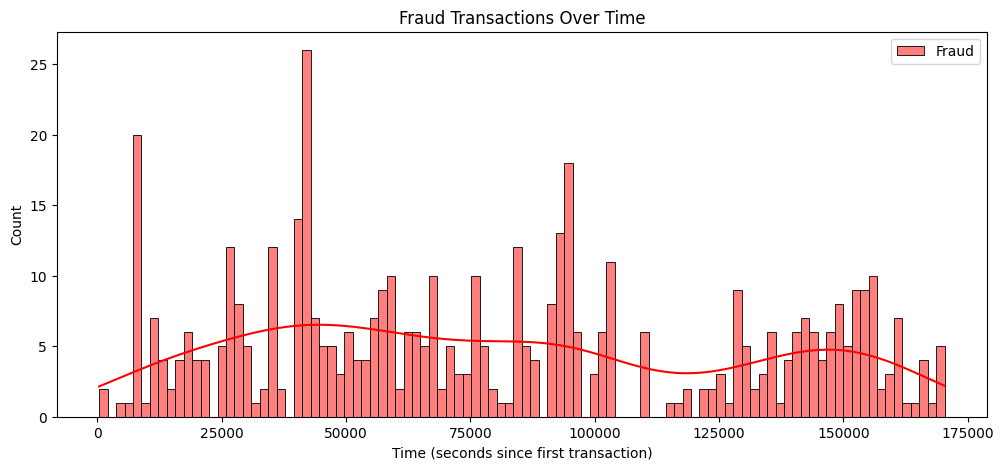

In [5]:
plt.figure(figsize=(12, 5))

sns.histplot(df[df['Class'] == 1]['Time'], bins=100, color='red', label='Fraud', kde=True)
plt.title('Fraud Transactions Over Time')
plt.xlabel('Time (seconds since first transaction)')
plt.legend()
plt.show()


# **Preprocessing**

In [6]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [7]:
from sklearn.preprocessing import StandardScaler

df['Amount_scaled'] = StandardScaler().fit_transform(df[['Amount']])
df['Time_scaled'] = StandardScaler().fit_transform(df[['Time']])


In [8]:
df = df.drop(['Amount', 'Time'], axis=1)


In [9]:
X = df.drop("Class", axis=1)
y = df["Class"]


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# **Autoencoder for Anomaly Detection**

In [11]:
pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [13]:
df = pd.read_csv(path + "/creditcard.csv")

# Scale Amount and Time
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_scaled'] = scaler.fit_transform(df[['Time']])
df = df.drop(['Amount', 'Time'], axis=1)

# Features and labels
X = df.drop("Class", axis=1).values
y = df["Class"].values

# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Only use normal transactions to train autoencoder
X_train_normal = X_train[y_train == 0]


In [14]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [15]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_normal, dtype=torch.float32)
train_loader = DataLoader(TensorDataset(X_train_tensor), batch_size=256, shuffle=True)

model = Autoencoder(input_dim=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
n_epochs = 20
for epoch in range(n_epochs):
    total_loss = 0
    for batch in train_loader:
        x = batch[0]
        optimizer.zero_grad()
        x_recon = model(x)
        loss = criterion(x_recon, x)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {total_loss:.4f}")


Epoch 1/20, Loss: 551.4037
Epoch 2/20, Loss: 327.5867
Epoch 3/20, Loss: 302.3171
Epoch 4/20, Loss: 287.4032
Epoch 5/20, Loss: 280.6253
Epoch 6/20, Loss: 276.5109
Epoch 7/20, Loss: 272.9038
Epoch 8/20, Loss: 268.7277
Epoch 9/20, Loss: 264.4456
Epoch 10/20, Loss: 260.9167
Epoch 11/20, Loss: 258.0374
Epoch 12/20, Loss: 256.1630
Epoch 13/20, Loss: 254.3277
Epoch 14/20, Loss: 251.3436
Epoch 15/20, Loss: 246.2321
Epoch 16/20, Loss: 240.9532
Epoch 17/20, Loss: 237.3416
Epoch 18/20, Loss: 235.6535
Epoch 19/20, Loss: 234.5264
Epoch 20/20, Loss: 233.7338


In [16]:

with torch.no_grad():
    recon = model(X_train_tensor)
    loss = ((recon - X_train_tensor) ** 2).mean(dim=1)

threshold = torch.quantile(loss, 0.95).item()
print("Reconstruction error threshold:", threshold)


Reconstruction error threshold: 0.5973374843597412


In [17]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

with torch.no_grad():
    recon_test = model(X_test_tensor)
    test_loss = ((recon_test - X_test_tensor) ** 2).mean(dim=1)
    y_pred = (test_loss > threshold).int().numpy()


In [18]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))


[[53921  2943]
 [   10    88]]
              precision    recall  f1-score   support

           0     0.9998    0.9482    0.9733     56864
           1     0.0290    0.8980    0.0562        98

    accuracy                         0.9482     56962
   macro avg     0.5144    0.9231    0.5148     56962
weighted avg     0.9981    0.9482    0.9718     56962



# **Evaluation**

In [19]:
import numpy as np

with torch.no_grad():
    recon_test = model(torch.tensor(X_test, dtype=torch.float32))
    reconstruction_error = torch.mean((recon_test - torch.tensor(X_test, dtype=torch.float32)) ** 2, dim=1).numpy()


In [20]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt


In [21]:
precision, recall, thresholds = precision_recall_curve(y_test, reconstruction_error)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.4f}")


PR AUC: 0.5713


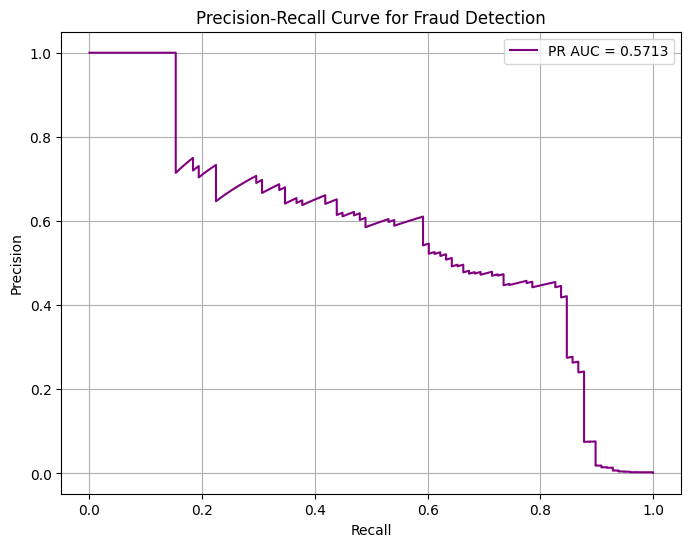

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Fraud Detection')
plt.grid(True)
plt.legend()
plt.show()
